# Proyecto: Análisis Exploratorio de Datos
*Exploratory Data Analysis*

- Fecha de entrega: 19-20 Mayo
- Datos usados: 
- Fuente de los datos: Kaggle.

# Extracción
## Importamos las librerías de Python 📊 

In [76]:
# Librerias usadas
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import trim_mean


Importamos los datos y los transformamos en un `DataFrame`, un formato para análisis de datos en Python

In [88]:
csv = pd.read_csv("./Data/songs.csv")
# Renonmbramos para mantener la original
data = csv
# Visualizacion de la data
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


-------

# Transformación
## Limpieza de datos 🧽 

**Datos Faltantes**

La primera cosa que revisaremos es si tenemos información faltante, que puedan provocar sesgos o escondan información.

In [89]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
artist,0,0.0
song,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0


*Tenemos todos los campos llenos*

Pero visualicemos mejor la calidad de la información.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Eliminamos datos duplicados

In [91]:
data = data.drop_duplicates()
# Nos quedan 1941 datos
data.shape

(1941, 18)

**Estándarizar los datos**

Vamos a empezar con la columna de `explicit`, asignando $1$ o $0$ según sea el caso

In [93]:
data['explicit'] = [1 if nc else 0 for nc in data['explicit']]
data.head()

C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_3252\3271492653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['explicit'] = [1 if nc else 0 for nc in data['explicit']]


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Pasamos milisegundos a minutos

In [94]:
data['duration_ms'] = data['duration_ms']/60000
data.columns = ['artist', 'song', 'duration_min', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre']

C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_3252\4282116975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'] = data['duration_ms']/60000


In [95]:
data.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.519333,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,2.784433,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,4.175767,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,3.741550,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,3.342667,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Vamos a modificar la columna de `genre` para asignarle un valor numérico.

In [96]:
df_genre = data['genre'].value_counts()
df_genre

pop                                      416
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
country   

In [97]:
df_genre = df_genre.to_frame(name='num_repet')
df_genre = df_genre[df_genre['num_repet'] > 4]
list_genre = df_genre.index
list_genre

Index(['pop', 'hip hop, pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic',
       'pop, R&B', 'hip hop', 'hip hop, pop, Dance/Electronic', 'rock',
       'Dance/Electronic', 'rock, pop', 'rock, metal', 'pop, latin',
       'pop, rock', 'set()', 'latin', 'hip hop, Dance/Electronic',
       'pop, rock, metal', 'hip hop, pop, latin', 'R&B',
       'pop, rock, Dance/Electronic', 'metal', 'hip hop, pop, rock', 'country',
       'pop, Folk/Acoustic', 'rock, pop, Dance/Electronic', 'pop, country',
       'pop, R&B, Dance/Electronic'],
      dtype='object')

Eliminamos aquellos géneros que aparecen menos de 3 veces

In [98]:
# filtro
data = data[data['genre'].isin(list_genre)]

In [99]:
corr = data.corr()
corr

,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_min,1.000000,0.122456,-0.323870,0.050005,-0.056805,-0.080740,0.001410,-0.085997,-0.000146,0.064614,0.012472,-0.012812,0.032700,-0.110419,-0.040763
explicit,0.122456,1.000000,0.072229,0.047946,0.241483,-0.165787,0.003166,-0.097119,0.051370,0.418976,-0.022228,-0.077819,0.010180,-0.046796,0.012600
year,-0.323870,0.072229,1.000000,-0.013991,0.028883,-0.118881,0.005232,0.011969,-0.006542,-0.001241,0.046758,-0.037027,-0.028187,-0.216552,0.077130
popularity,0.050005,0.047946,-0.013991,1.000000,-0.000091,-0.016132,0.015208,0.032149,-0.022975,0.020054,0.018633,-0.045955,0.001762,-0.007589,0.011423
danceability,-0.056805,0.241483,0.028883,-0.000091,1.000000,-0.104141,0.030570,-0.043216,-0.063656,0.138739,-0.062875,0.027375,-0.132220,0.400175,-0.173044
energy,-0.080740,-0.165787,-0.118881,-0.016132,-0.104141,1.000000,-0.004994,0.646698,-0.046976,-0.054711,-0.442260,0.054791,0.151725,0.331722,0.150344
key,0.001410,0.003166,0.005232,0.015208,0.030570,-0.004994,1.000000,-0.012357,-0.149326,0.005157,0.000891,-0.000892,-0.044389,0.033618,-0.009917
loudness,-0.085997,-0.097119,0.011969,0.032149,-0.043216,0.646698,-0.012357,1.000000,-0.025511,-0.086782,-0.300889,-0.092863,0.103485,0.223753,0.075993
mode,-0.000146,0.051370,-0.006542,-0.022975,-0.063656,-0.046976,-0.149326,-0.025511,1.000000,0.003171,0.013552,-0.033944,0.022720,-0.078884,0.048536
speechiness,0.064614,0.418976,-0.001241,0.020054,0.138739,-0.054711,0.005157,-0.086782,0.003171,1.000000,-0.004166,-0.055626,0.055768,0.068937,0.062453


Podemos ver así la relación entre más alta entre los datos de `loudness` y `energy` por lo que podríamos tener la hiótesis de que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

De acuerdo a lo anterior, entre `energy` y `loudness` tomaremos solo una columna.
También eliminaremos columnas que no nos son útiles: `artist`, `song`, `mode`, `instrumentalness`


In [100]:
data_final = data.drop(['artist', 'song', 'energy', 'mode'], axis = 1)

Cambiamos los valores en la columna `genre` a una escala numérica

In [33]:
value_genre = [i for i in range(len(list_genre))]
dict_genre = dict(zip(list_genre, value_genre))
data_final = data_final.replace(dict_genre)

**Data final**

In [34]:
data_final.head()

,duration_min,explicit,year,popularity,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,3.519333,0,2000,77,0.751,1,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053,0
1,2.784433,0,1999,79,0.434,0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726,9
2,4.175767,0,1999,66,0.529,7,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859,25
3,3.741550,0,2000,78,0.551,0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992,10
4,3.342667,0,2000,65,0.614,8,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656,0


-----------

# Estadísticos descriptivos
## Exploremos los datos 🔍 

- Tenemos un DataFrame de por **18 columnas** (variables) y **2000 filas** (datos).
- En el csv tenemos datos categóricos (`artist`,`song` o `genre`) y datos cuantitativos (discretos `duration_ms`, boleanos `explicit`, continuos `danceability`, por ejemplo).
- Nuestra información no presenta datos nulos, por lo que en un inicio podemos usar toda la información.

In [35]:
data_final.describe()

,duration_min,explicit,year,popularity,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.00000,1892.000000
mean,3.809831,0.280655,2009.577167,59.679175,0.669259,5.375264,-5.502125,0.104241,0.126558,0.014193,0.182107,0.552574,120.30377,4.298097
std,0.654486,0.449438,5.873050,21.506413,0.140394,3.618038,1.917268,0.096173,0.169971,0.084954,0.140631,0.220866,27.07576,5.244718
min,1.883333,0.000000,1998.000000,0.000000,0.129000,0.000000,-20.514000,0.023200,0.000019,0.000000,0.021500,0.038100,60.01900,0.000000
25%,3.393000,0.000000,2005.000000,56.000000,0.584000,2.000000,-6.488500,0.039900,0.013500,0.000000,0.088600,0.390000,98.99125,1.000000
50%,3.720325,0.000000,2010.000000,65.000000,0.677500,6.000000,-5.279500,0.061200,0.055900,0.000000,0.125500,0.558500,120.04200,3.000000
75%,4.131879,1.000000,2015.000000,73.000000,0.766000,8.000000,-4.167750,0.131000,0.175000,0.000065,0.243000,0.731000,134.58500,5.000000
max,8.069100,1.000000,2020.000000,89.000000,0.975000,11.000000,-0.276000,0.576000,0.976000,0.985000,0.843000,0.973000,210.85100,26.000000


**¿Qué información obtenemos?**

- *La duración promedio de las canciones es de $3.8$ minutos*
- *El año promedio de lanzamiento es $2009$, lo que tiene sentido viendo que el rango de años va de 1998 y 2020*
- *El promedio del tempo de las canciones, es de $120$ bpm. Cada estilo y género musical está asociado a un ritmo, por lo cual teóricamente cada género tiene su propio Tempo es decir “su propio” BPM, el valor de 120 bpm, suele relacionarse a la música electrónica.*

Otra estadística que podemos calcular, es la moda de los datos.

In [59]:
data.mode()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Drake,Sorry,3.093100,0.0,2012.0,0.0,0.687,0.783,1.0,-6.366,1.0,0.0432,0.107,0.0,0.104,0.418,140.022,pop
1,Rihanna,NaN,3.335100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.535100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.539333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.687100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,3.710883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,4.058883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,4.481100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si quisieramos ver más fácilmente la correlación con una variable, por ejemplo `popularity`, podemos apoyarnos en el siguiente gráfico

In [36]:
corr[['popularity']].sort_values(by = 'popularity',ascending = False).style.background_gradient()

,popularity
popularity,1.000000
duration_min,0.050005
explicit,0.047946
loudness,0.032149
speechiness,0.020054
acousticness,0.018633
key,0.015208
tempo,0.011423
liveness,0.001762
danceability,-0.000091


Dado que ninguna variable está tan fuertemente correlacionada con `popularity`, puede que estos datos no nos darían la información suficiente para hacer un modelo que pronostique la popularidad de una canción.

Podemos ver la información en otras tablas, en este caso una tabla que por año nos muestre la valencia media de las canciones. Por lo que vemos, en el año $2001$ las canciones promediaron el máximo valor que fue de $0.661041$ y en $2020$ se ha tenido el mínimo con $0.467215$.

In [37]:
tabla = data_final.groupby('year').agg({'valence': ['min','mean','max']})
tabla

valence                 
         min      mean    max
year                         
1998  0.5270  0.527000  0.527
1999  0.0783  0.561119  0.961
2000  0.2060  0.661806  0.973
2001  0.0824  0.663470  0.969
2002  0.1000  0.585143  0.966
2003  0.0681  0.623701  0.965
2004  0.0596  0.610738  0.973
2005  0.0800  0.547305  0.966
2006  0.1400  0.600900  0.964
2007  0.0406  0.549510  0.972
2008  0.0756  0.555017  0.972
2009  0.0942  0.565578  0.968
2010  0.0784  0.568162  0.957
2011  0.0886  0.536634  0.965
2012  0.0694  0.562327  0.965
2013  0.0381  0.483307  0.952
2014  0.1040  0.519602  0.962
2015  0.0883  0.492869  0.964
2016  0.0594  0.482233  0.907
2017  0.0793  0.484499  0.966
2018  0.1120  0.471971  0.877
2019  0.1010  0.530241  0.952
2020  0.3810  0.429500  0.478

Tomemos la columna de `danceability` para calcular algunos *estimates of location*

In [38]:
print('La media del nivel de danceability es:', data_final['danceability'].mean())
print('La mediana del nivel de danceability es:', data_final['danceability'].median())
print('La media recortada del nivel de danceability es:', trim_mean(data_final['danceability'],0.1))

La media del nivel de danceability es: 0.6692589852008457
La mediana del nivel de danceability es: 0.6775
La media recortada del nivel de danceability es: 0.6752351387054161


Como ya calculamos la matriz de correlación, podemos ahora verla incluso en un gráfico

<AxesSubplot:>

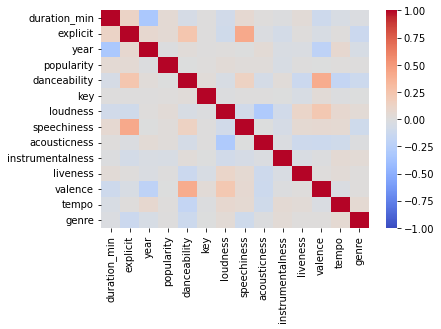

In [39]:
sns.heatmap(data_final.corr(), vmin = -1, vmax = +1, cmap = 'coolwarm')

--------------

## Preguntas planteadas 🤔

1. ¿Cuáles son las 10 canciones más populares?

In [41]:
data.nlargest(10,'popularity')

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,4.006667,0,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,4.072667,1,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,4.838667,1,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,4.736667,1,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1613,WILLOW,Wait a Minute!,3.275333,0,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),3.336417,0,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
209,Eminem,'Till I Collapse,4.963100,1,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,hip hop
1227,Bruno Mars,Locked out of Heaven,3.891300,0,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1512,The Neighbourhood,Daddy Issues,4.336217,0,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1514,Avicii,The Nights,2.944300,0,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"


2. Canciones con mayor y menor `valence`

In [52]:
data.nlargest(5,'valence')

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
72,Vengaboys,Shalala Lala,3.580317,0,2000,58,0.751,0.901,2,-5.802,1,0.0328,0.0504,0.003080,0.0395,0.973,124.017,pop
434,Juanes,La Camisa Negra,3.611767,0,2004,70,0.751,0.731,6,-4.419,0,0.0308,0.0838,0.000000,0.0556,0.973,97.007,"pop, latin"
731,Keyshia Cole,Last Night,4.261767,0,2007,60,0.918,0.857,3,-5.032,0,0.0623,0.1660,0.000300,0.0855,0.972,121.006,"hip hop, pop, R&B"
826,Madonna,Give It 2 Me,4.798433,0,2008,57,0.837,0.954,8,-3.512,0,0.0414,0.0933,0.000405,0.1430,0.972,127.019,pop
114,Mary J. Blige,Family Affair,4.431100,0,2001,76,0.911,0.551,8,-3.750,0,0.0449,0.1320,0.000041,0.0863,0.969,92.887,"pop, R&B"


In [51]:
data.nsmallest(5, 'valence')

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1318,Martin Garrix,Animals - Radio Edit,2.935283,0,2013,0,0.593,0.914,1,-5.351,1,0.0363,0.00137,0.445000,0.0714,0.0381,128.015,"pop, Dance/Electronic"
865,The-Dream,I Luv Your Girl,4.464433,1,2007,62,0.723,0.322,8,-9.702,1,0.0341,0.01400,0.000000,0.1190,0.0406,90.063,"hip hop, pop, R&B"
1666,Drake,Pop Style,3.549100,1,2016,63,0.713,0.462,7,-10.027,1,0.1230,0.19200,0.000002,0.1050,0.0594,133.053,"hip hop, pop, R&B"
302,Eminem,"Lose Yourself - From ""8 Mile"" Soundtrack",5.370433,1,2004,77,0.686,0.735,2,-4.616,1,0.2640,0.00921,0.000660,0.3420,0.0596,171.355,hip hop
404,Hoobastank,The Reason,3.880000,0,2003,79,0.472,0.671,4,-4.649,1,0.0290,0.01290,0.000000,0.1590,0.0681,82.952,"pop, rock, metal"


3. ¿Cuáles son los géneros más repetidos?

In [42]:
genres = pd.DataFrame(data['genre'].value_counts().head(10))
genres

,genre
pop,416
"hip hop, pop",267
"hip hop, pop, R&B",236
"pop, Dance/Electronic",216
"pop, R&B",172
hip hop,121
"hip hop, pop, Dance/Electronic",75
rock,57
Dance/Electronic,41
"rock, pop",39


<AxesSubplot:>

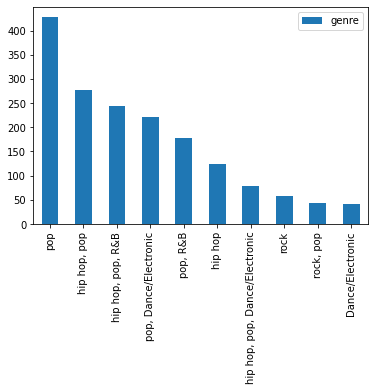

In [28]:
genres.plot(kind='bar')

3. ¿Qué variables tiene mayor relación con la `valence`?

In [71]:
corr[['valence']].sort_values(by = 'valence',ascending = False).style.background_gradient()

,valence
valence,1.000000
danceability,0.400175
energy,0.331722
loudness,0.223753
speechiness,0.068937
key,0.033618
liveness,0.008876
popularity,-0.007589
instrumentalness,-0.010358
tempo,-0.024129


C:\Users\latitude e5450\Documents\Tzuzu Code\DataScience\env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


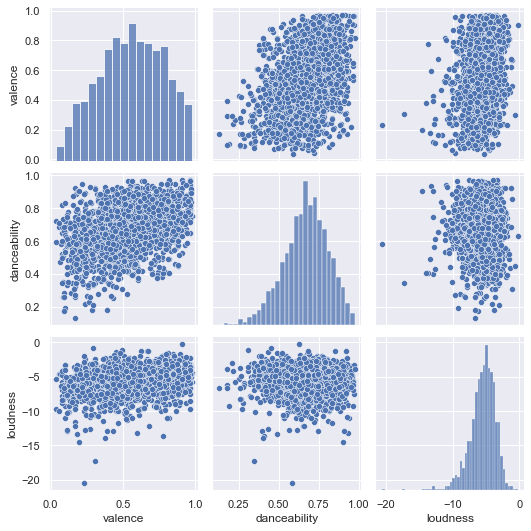

In [72]:
sns.set()
cols = ['valence', 'danceability', 'loudness']
sns.pairplot(data_final[cols], size = 2.5)
plt.show();

4. ¿Qué artistas aparecen más veces en el DataFrame?

In [102]:
data['artist'].mode(dropna=False)

0      Drake
1    Rihanna
Name: artist, dtype: object

5. 

In [114]:
mode_100 = pd.DataFrame(data['key'].value_counts())
mode_100

,key
1,252
7,193
0,191
11,187
5,168
8,165
2,148
9,147
6,146
10,122
